In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
DATA_FOLDER = '../data/'
DATA_ZIP = DATA_FOLDER + 'datasets.zip'

DATA_TRAIN_PATH = DATA_FOLDER + 'train.csv'
DATA_TEST_PATH = DATA_FOLDER + 'test.csv' 

# Load the training data

In [3]:
from proj1_helpers import *
from split_data import *
from data_processing import *

y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
y_clean, tX_clean, ids_clean = clean_training(y, tX, ids)

TODO: only remove outliers when max - min > threshold like 10
    Doubt with DER_deltar_tau_lep and PRI_jet_all_pt
(153682, 30)
TODO: only remove outliers when max - min > threshold like 10
    Doubt with DER_deltar_tau_lep and PRI_jet_all_pt
(153655, 30)


# Creating training and vallidation sets

In [4]:
split_ratio = 0.5
tX_train, tX_validation, y_train, y_validation = split_data(tX, y, split_ratio)
tX_train_clean, tX_validation_clean, y_train_clean, y_validation_clean = split_data(tX_clean, y_clean, split_ratio)

In [5]:
print("Raw set : ")
row_format = "{:<15}" * 3
print(row_format.format("", "Training", "Validation"))
print(row_format.format("Features", str(tX_train.shape), str(tX_validation.shape)))
print(row_format.format("Labels", str(y_train.shape), str(y_validation.shape)))

print("\nClean set : ")
row_format = "{:<15}" * 3
print(row_format.format("", "Training", "Validation"))
print(row_format.format("Features", str(tX_train_clean.shape), str(tX_validation_clean.shape)))
print(row_format.format("Labels", str(y_train_clean.shape), str(y_validation_clean.shape)))

Raw set : 
               Training       Validation     
Features       (125000, 30)   (125000, 30)   
Labels         (125000,)      (125000,)      

Clean set : 
               Training       Validation     
Features       (76828, 30)    (76827, 30)    
Labels         (76828,)       (76827,)       


# Testing every basic model on cleaned data

In [5]:
from pipeline import *
from cross_validation import find_best_parameter

### Gradient Descent

In [142]:
max_iters = 100
gamma = 0.1

weights, loss = model_data(y_train_clean, tX_train_clean, 'gradient_descent', max_iters=max_iters, gamma=gamma)

# Not compared with the not cleaned set, because it needs normalizing to work
print("Training loss : {}".format(loss))
print("Validation loss : {}".format(get_loss(y_validation_clean, tX_validation_clean, weights)))

Training loss : 0.31869817883105916
Validation loss : 0.31956575907795126


In [ ]:
gammas = np.logspace(-4, 0, 3)

best_gamma = find_best_parameter(y_clean, tX_clean, 'gradient_descent', 'gamma', gammas, max_iters=100)

### Stochastic Gradient Descent

In [309]:
max_iters = 100
gamma = 0.03

weights, loss = model_data(y_clean, tX_clean, 'stochastic_gradient_descent', max_iters=max_iters, gamma=gamma, poly_exp=2)

# Not compared with the not cleaned set, because it needs normalizing to work
print("Training loss : {}".format(loss))
print("Validation loss : {}".format(get_loss(y_validation_clean, build_poly_2D(tX_validation_clean, 2), weights)))

0.5
0.3983498440552132
0.3665718574226868
0.3653299257994504
0.34024460019402053
0.3424230273665288
0.34428504453936976
0.3247905149846535
0.34829301260695084
0.33791115029018653
0.29724621046231814
0.33174055169980454
0.29634935452470457
0.2975509957347914
0.3149908434082841
0.30079307291162527
0.30841592022571834
0.32477531547760363
0.33213945697302405
0.3116045213437086
0.3321214383023717
0.30465860200583705
0.3097517625070477
0.28106556202536603
0.3136668069175507
0.3034411508394746
0.30381617674865213
0.2835462485250042
0.3133689939139692
0.3094165034600658
0.294562858616755
0.29937959777274137
0.3287753474664995
0.3037614795748445
0.28646314114104265
0.285106029757153
0.31387755754833774
0.3171544702784554
0.30884335192593215
0.3139519167366284
0.3219194450596008
0.30166540633221667
0.296270953614993
0.2897790182973687
0.33995975353464736
0.2960806136296746
0.3154369129420398
0.2848849000656758
0.31509794103788297
0.277662148474128
0.31377903982192845
0.2958592878324341
0.3233779

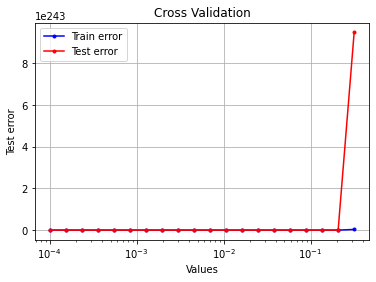

Best gamma is 0.02481628922836824 with loss 0.2933073866694787


In [311]:
gammas = np.logspace(-4, -0.5, 20)

best_gamma, best_loss = find_best_parameter(y_clean, tX_clean, 'stochastic_gradient_descent', 'gamma', gammas, max_iters=100, poly_exp=2)
print("Best gamma is {} with loss {}".format(best_gamma, best_loss))

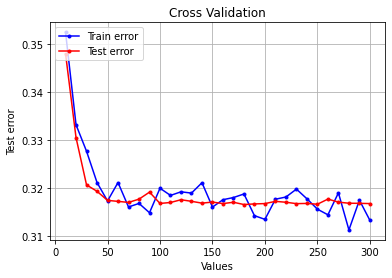

Best max_iters is 180 with loss 0.3165231580877593


In [175]:
max_iter_values = (np.arange(30)+1)*10

best_iter, best_loss = find_best_parameter(y_clean, tX_clean, 'stochastic_gradient_descent', 'max_iters', max_iter_values, logspace=False, gamma=0.3, poly_exp=1)
print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

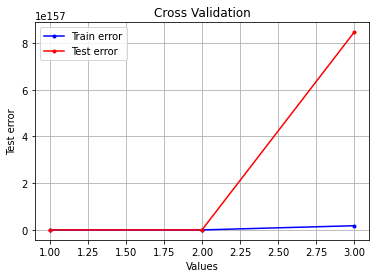

Best max_iters is 2 with loss 0.2921937570762111


In [263]:
expansion_values = [1, 2, 3]

best_iter, best_loss = find_best_parameter(y_clean, tX_clean, 'stochastic_gradient_descent', 'poly_exp', expansion_values, logspace=False, k_fold=4, max_iters=100, gamma=0.03)
print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

### Least Squares

In [7]:
expansion_values = np.arange(20)

best_iter, best_loss = find_best_parameter(y_clean, tX_clean, 'least_squares', 'poly_exp', expansion_values, logspace=False)
print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

Rank of the matrix is 24, for D = 30
Rank of the matrix is 24, for D = 30
Rank of the matrix is 24, for D = 30
Rank of the matrix is 24, for D = 30
Rank of the matrix is 24, for D = 30
Rank of the matrix is 24, for D = 30
Rank of the matrix is 24, for D = 30
Rank of the matrix is 24, for D = 30
Rank of the matrix is 45, for D = 60
Rank of the matrix is 45, for D = 60
Rank of the matrix is 45, for D = 60
Rank of the matrix is 45, for D = 60
Rank of the matrix is 66, for D = 90
Rank of the matrix is 66, for D = 90
Rank of the matrix is 66, for D = 90
Rank of the matrix is 66, for D = 90
Rank of the matrix is 87, for D = 120
Rank of the matrix is 87, for D = 120
Rank of the matrix is 87, for D = 120
Rank of the matrix is 87, for D = 120
Rank of the matrix is 107, for D = 150
Rank of the matrix is 107, for D = 150
Rank of the matrix is 107, for D = 150
Rank of the matrix is 107, for D = 150
Rank of the matrix is 127, for D = 180
Rank of the matrix is 127, for D = 180
Rank of the matrix is 

KeyboardInterrupt: 

In [25]:
print(build_poly_2D(tX_clean))

(30,)
[  5955      1      2      4 125986 125982 125985    111      6      0
    129   1340 127007      7     48     47      6     41     52      5
     34      0  76101  39913  39923  39923 125982 125983 125984  39913]
(250000, 30)


In [37]:
for i in range(len(tX_clean.T)):
    print(i)
    print(np.unique(tX_clean.T[i]).shape)
    print(np.unique(tX.T[i]).shape)

0
(75828,)
(108338,)
1
(81220,)
(101637,)
2
(72757,)
(100558,)
3
(65680,)
(115563,)
4
(1,)
(7087,)
5
(1,)
(68366,)
6
(1,)
(16593,)
7
(3720,)
(4692,)
8
(40161,)
(59042,)
9
(85073,)
(156098,)
10
(2769,)
(5931,)
11
(2829,)
(2829,)
12
(1,)
(1002,)
13
(40331,)
(59639,)
14
(4963,)
(4971,)
15
(6285,)
(6285,)
16
(41029,)
(61929,)
17
(4977,)
(4987,)
18
(6285,)
(6285,)
19
(60813,)
(87836,)
20
(6285,)
(6285,)
21
(110839,)
(179740,)
22
(2,)
(4,)
23
(38291,)
(86590,)
24
(8271,)
(8558,)
25
(6283,)
(6285,)
26
(1,)
(42464,)
27
(1,)
(8628,)
28
(1,)
(6286,)
29
(38299,)
(103559,)


### Ridge Regression

In [8]:
expansion_values = np.arange(20)

best_iter, best_loss = find_best_parameter(y_clean, tX_clean, 'least_squares', 'poly_exp', expansion_values, logspace=False)
print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

Rank of the matrix is 24, for D = 30
Rank of the matrix is 24, for D = 30
Rank of the matrix is 24, for D = 30
Rank of the matrix is 24, for D = 30
Rank of the matrix is 24, for D = 30
Rank of the matrix is 24, for D = 30
Rank of the matrix is 24, for D = 30
Rank of the matrix is 24, for D = 30
Rank of the matrix is 45, for D = 60
Rank of the matrix is 45, for D = 60
Rank of the matrix is 45, for D = 60
Rank of the matrix is 45, for D = 60
Rank of the matrix is 66, for D = 90
Rank of the matrix is 66, for D = 90
Rank of the matrix is 66, for D = 90
Rank of the matrix is 66, for D = 90
Rank of the matrix is 87, for D = 120


KeyboardInterrupt: 

(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix X^TX + lambda has rank  168
(115239, 270)
Matrix

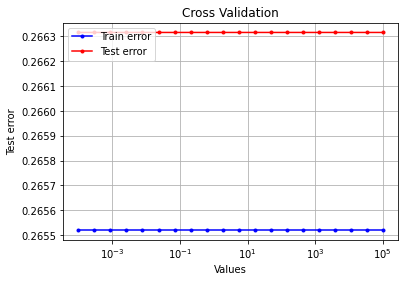

Best lambda is 48.32930238571752 with loss 0.26631576713052874


In [286]:
lambdas = np.logspace(-4, 5, 20)

best_lambda, best_loss = find_best_parameter(y_clean, tX_clean, 'ridge_regression', 'lambda_', lambdas, poly_exp=8)
print("Best lambda is {} with loss {}".format(best_lambda, best_loss))

(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)
Matrix X^TX + lambda has rank  25
(115239, 30)


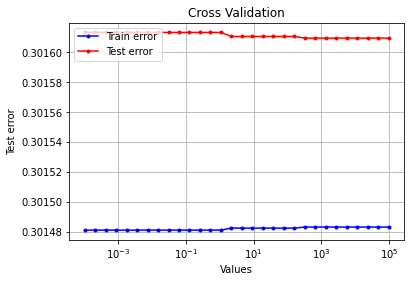

Best lambda is 11721.022975334794 with loss 0.30160940569540307


In [285]:
lambdas = np.logspace(-4, 5, 30)

best_lambda, best_loss = find_best_parameter(y_clean, tX_clean, 'ridge_regression', 'lambda_', lambdas, poly_exp=1)
print("Best lambda is {} with loss {}".format(best_lambda, best_loss))

### Logistic Regression

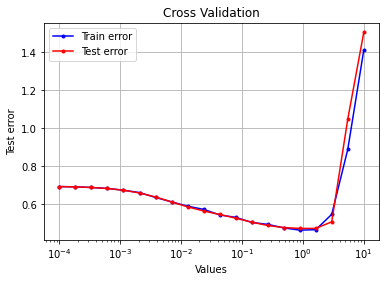

Best gamma is 1.623776739188721 with loss 0.4707991175123466


In [316]:
gammas = np.logspace(-4, 1, 20)

best_gamma, best_loss = find_best_parameter(y_clean, tX_clean, 'logistic_regression', 'gamma', gammas, max_iters=150, poly_exp=1)
print("Best gamma is {} with loss {}".format(best_gamma, best_loss))

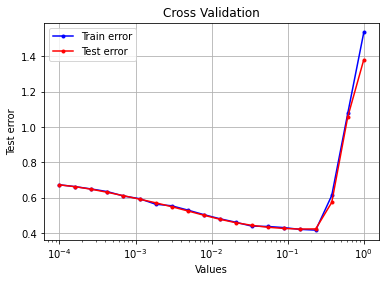

Best gamma is 0.14384498882876628 with loss 0.4221798370276316


In [323]:
gammas = np.logspace(-4, 0, 20)

best_gamma, best_loss = find_best_parameter(y_clean, tX_clean, 'logistic_regression', 'gamma', gammas, max_iters=150, poly_exp=2)
print("Best gamma is {} with loss {}".format(best_gamma, best_loss))

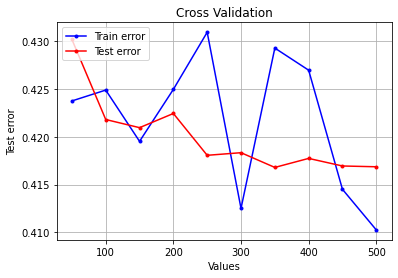

Best max_iters is 350 with loss 0.4167930162264529


In [322]:
iters = (np.arange(10)+1)*50

best_iter, best_loss = find_best_parameter(y_clean, tX_clean, 'logistic_regression', 'max_iters', iters, logspace=False, gamma=0.15, poly_exp=2)
print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

### Penalized Logistic Regression

C:\Users\Moi\Desktop\Desktop\EPFL\Master\MA1\CS-433 - Machine Learning\CS-433-machine-learning\project1\scripts\logistic_regression.py:7: RuntimeWarning: overflow encountered in exp
  inv_exp = np.exp(-t)
C:\Users\Moi\Desktop\Desktop\EPFL\Master\MA1\CS-433 - Machine Learning\CS-433-machine-learning\project1\scripts\costs.py:28: RuntimeWarning: overflow encountered in exp
  sum_logs = np.log(np.exp(prediction) + 1).sum()


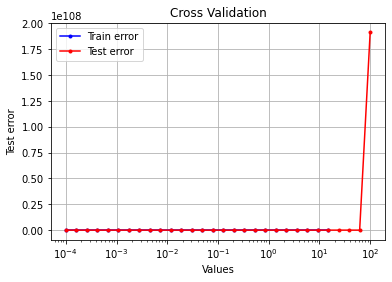

Best lambda is 0.0001 with loss 0.4240364250114062


In [329]:
lambdas = np.logspace(-4, 2, 30)

best_lambda, best_loss = find_best_parameter(y_clean, tX_clean, 'regularized_logistic_regression', 'lambda_', lambdas, max_iters=150, gamma=0.1, poly_exp=2)
print("Best lambda is {} with loss {}".format(best_lambda, best_loss))

## Generate predictions and save ouput in csv format for submission:

In [270]:
#This enable to run all cells without running this one when unnecessary
if True :
    y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
    y_test_clean, tX_test_clean, ids_test_clean = clean_test(y_test, tX_test, ids_test)
    tX_test_clean_poly = build_poly_2D(tX_test_clean, 2)
    OUTPUT_PATH = DATA_FOLDER + 'submission.csv' 
    if True: ## Only for logistic regression, we will do something nice later
        y_pred = predict_labels_logistic(weights_clean, tX_test_clean_poly)
    else:
        y_pred = predict_labels(weights, tX_test_clean_poly)
    create_csv_submission(ids_test_clean, y_pred, OUTPUT_PATH)
else :
    print("Change False to True to generate prediction")

ValueError: shapes (568238,87) and (90,) not aligned: 87 (dim 1) != 90 (dim 0)

In [25]:
def model_accuracy(weights, tX, correct_labels, logistic=False):
    if logistic :
        pred = predict_labels_logistic(weights, tX)
    else :
        pred = predict_labels(weights, tX)
    compare_array = (pred == correct_labels)
    return np.count_nonzero(compare_array)/len(compare_array)
    

In [26]:
#model_accuracy testing
weights, loss = model_data(y_train_clean, tX_train_clean, 'stochastic_gradient_descent', max_iters=180, gamma=0.24, poly_exp=2)
tX_poly = build_poly_2D(tX_validation_clean, 2)
print(model_accuracy(weights, tX_poly, y_validation_clean))

0.6941179533237013
